# The Python toolbox

This module requires you to be familiar with the Python environment in order to solve biochemical engineering problems.
The tools needed to succesfully complete this module include: plotting, solving matrices, working with functions, and integrating functions in the Python environment. These tools will be used beyond CBI310 in your second semester and in your final year. Basic coding principles such as defining variables, writing for/while loops, and writing out mathematical formulas, are assumed to be knowledge aquired in MPR210. This tutorial aims to give you a short overview of the coding skills required throughout this module and gives you the opportunity to revise previously aqcuired coding knowledge.

## 1. Fundamentals
When a problem statement is given, the first thing you should do is to translate words to mathematics. This is achieved through the definition of parameters, variables, and functions. The following example is supposed to remind you of the correct syntax to use when defining a function.

Example:
What is the volume of a sphere?
- We know that the volume of a sphere is calculated by using: $V = 4/3*\pi*r^{3}$

In [4]:
import numpy as np #We need this library to use the functions in Python

def Volume_of_sphere (r):
    V = 4/3*np.pi*r**3
    return V

We can now use this function to calculate the volume of a sphere with any radius. Eg. r = 2, r = 4, and r = 10.

In [5]:
Volume_of_sphere(2), Volume_of_sphere(4), Volume_of_sphere(10)

(33.510321638291124, 268.082573106329, 4188.790204786391)

Rewriting this is inefficient coding. To make the code more efficient, we can use a for loop. This is illustrated below:

In [6]:
for i in [2,4,10]:
    print(Volume_of_sphere(i))

33.510321638291124
268.082573106329
4188.790204786391


Let's say we wanted to know the volume of spheres with radii from 1 to 10 with increments of 1. We can set up a list of these values in various ways. Below different methods are illustrated:

In [7]:
list_1 = np.arange(1,11,1) #Often used in for loops

list_2 = [1,2,3,4,5,6,7,8,9,10] #Not very efficient

list_3 = np.linspace(1,10,10) #Usually used to define timespans when doing integrations

list_1, list_2, list_3

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

Now let's say you want to insert all the values in `list_3` into our `Volum_of_sphere` function. Many of you, especially those coming from other porgramming languages, will do it with a loop, as shown below.

In [8]:
for i in list_3:
    print(Volume_of_sphere(i))

4.1887902047863905
33.510321638291124
113.09733552923254
268.082573106329
523.5987755982989
904.7786842338603
1436.7550402417319
2144.660584850632
3053.6280592892786
4188.790204786391


But doing it this way defeats the entire purpose of using a numpy array. Numpy was purposefully built to make mathematical operations a breeze. One can, in this example, just simply put `list_3` straight in to your function. **Note** You can not do this with lists, only arrays.

In [11]:
Volume_of_sphere(list_3)

array([4.18879020e+00, 3.35103216e+01, 1.13097336e+02, 2.68082573e+02,
       5.23598776e+02, 9.04778684e+02, 1.43675504e+03, 2.14466058e+03,
       3.05362806e+03, 4.18879020e+03])

Now we would like to plot this data. For this we must import another library:

In [12]:
import matplotlib.pyplot as plt

Now below is how many of you would go and try and get the results of the volume function in to a list. 

In [8]:
Volumes_noob = [] #Create an empty list
for i in list_3:
    Volumes_noob.append(Volume_of_sphere(i)) #The values are appended to the list
Volumes_noob

[4.1887902047863905,
 33.510321638291124,
 113.09733552923254,
 268.082573106329,
 523.5987755982989,
 904.7786842338603,
 1436.7550402417319,
 2144.660584850632,
 3053.6280592892786,
 4188.790204786391]

But **NO**!! Firstly, as you saw, when you pass an array through the function an array is returned. No need for any looping!! No need to generate a list. Secondly, `append` is slow. If you have to pass the values using a for loop, and you need to make a new list from the results, then might I suggest the beautiful list comprehension. It is shown below

In [13]:
Volumes_pro = [Volume_of_sphere(i) for i in list_3] #You let the for loop run in the list itself
Volumes_pro

[4.1887902047863905,
 33.510321638291124,
 113.09733552923254,
 268.082573106329,
 523.5987755982989,
 904.7786842338603,
 1436.7550402417319,
 2144.660584850632,
 3053.6280592892786,
 4188.790204786391]

So what happens here is that the values are being laid out within the list, thus there is no need to append anything. This is so much faster as the values do need to be passed through the `append` function. It is also just one line, and is less typing. Win for us all. One can do very complex loops in list comprehensions, from mutliple for loop, conditional statements and many more. I suggest you read up about it on your own time. But as stated, in this example, the array method is the fastest and the best, so we are going to use that

In [14]:
Volumes = Volume_of_sphere(list_3)
Volumes

array([4.18879020e+00, 3.35103216e+01, 1.13097336e+02, 2.68082573e+02,
       5.23598776e+02, 9.04778684e+02, 1.43675504e+03, 2.14466058e+03,
       3.05362806e+03, 4.18879020e+03])

Now for some plotting

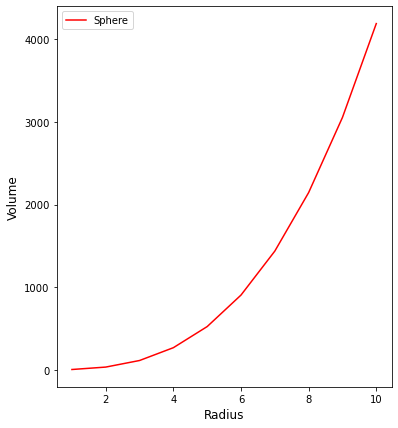

In [15]:
plt.figure(1,[6,7]) #First argument represents figure number, the second argument sizes the plot
plt.plot(list_3,Volumes, label = 'Sphere', color = 'r')
plt.xlabel('Radius', fontsize = 12)
plt.ylabel('Volume', fontsize = 12)
plt.legend(loc='best') #Legend automatically goes to the optimal location
plt.show()

Let look at another function now:
$$Money = 3Time^3 - 50^2 + 500Time + 25000 $$

In [16]:
Time = np.linspace(0,50,101)

Firstly when using linspace it is often beneficial to divide your time using a large number of increments plus one, it results in:

In [17]:
Time

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. ])

Instead of:

In [18]:
X = np.linspace(0,50,100)
X

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

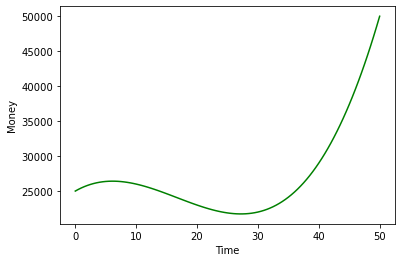

In [19]:
Money = Time**3 - 50*Time**2 + 500*Time + 25000

plt.plot(Time, Money, 'g')
plt.xlabel('Time')
plt.ylabel('Money')
plt.show()

Now to find points on the plot that you require. If you want to find the time when you have the lowest money use `np.argmin()`. It returns the index of the minimum. One can then use the index of the minimum of our y-value to find at which x-value is the minimum.

In [27]:
min_index = np.argmin(Money)
Time[min_index]

27.0

The maximum can be found with `np.argmax()`:

In [28]:
Money[np.argmax(Money)]

50000.0

Now let's say you want to find which time values gives money values that are not more than 1 from 30000. There are 2 ways, both of which have their pro's and cons.
1. **The boolean array**: This method is clean and simple, and best if all you want to do is find the time values. If you do not know what a boolean is, it is simply a **True** or **False**. You can pass comparisons to a numpy array, such as array1 == 2, and a new array will be generated that says which variable in that array is equal to 2 or not using **True** or **False**. You can then index using that array. Look at the example below 

In [29]:
array1 = np.array([5, 6, 2, 7, 2])
boolean_array = array1 == 2
boolean_array #This is an array of booleans. See how where there is a 2 in array 1 there is a True in this array.

array([False, False,  True, False,  True])

In [30]:
array2 = np.array([3, 8, 9, 4, 6])
array2[boolean_array] 

array([9, 6])

As one can see above, there is a **True** at index 2 and 4 in the boolean array. One can then use this array for indexing another array, where as you can see, the values at index 2 and 4 are returned for array2. This is called fancy indexing.

2. The second method uses `np.where`. What it does is return the index values where the comparison is **True**. Look at the example below

In [31]:
where_array = np.where(array1 == 2)
where_array, where_array[0] #an array within parenthesis is returned, thus you need to use [0] to get just the array

((array([2, 4], dtype=int64),), array([2, 4], dtype=int64))

In [32]:
array2[where_array[0]]

array([9, 6])

Using fancy indexing again, you can get the same result. `np.where` has the advantage of returning the exact points at which the condition is True, as well as making it easy to determine how many of the values meet the condition. Its drawback is that it is a bit more typing and less clean. You can use either method, or both, you decide. 

For our original question, we want to find the time values that gives money values that are not more than 1 from 30000. 

In [ ]:
Time = np.linspace(0,50,10001)
Money = Time**3 - 50*Time**2 + 500*Time + 25000

In [42]:
#Boolean
Time[abs(Money - 30000) < 1]

array([40.74])

In [43]:
#np.where
Time[np.where(abs(Money - 30000) < 1)[0]]

array([40.74])

The boolean method is just quicker typing 

## 2. The slider module

<div style="text-align: justify"> Often, one would want to change a value in a code in real time see what is changing on a graph when specific variables are changed. The $ipywidgets$ module allows one to create sliders where you can interact with the graph, changing values to see what the graph will do.</div>

In [44]:
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact

<div style="text-align: justify">Let's say we want to randomly place dots onto an axis, and we want to vary the number of dots between 1 dot and 100 dots, and on top of that we want to change the colours of the dots as we please. We will first write a function that makes this scatter plot. </div>


In [45]:
def dotty_amateur(dots, colour):
    a, b = [], []
    for i in range(dots):
        a.append(np.random.randint(1,100))
        b.append(np.random.randint(1,100))
    plt.scatter(a,b, c=colour)
    return()

### Pythonese

Let us take a quick side break from the `ipywidget` module. As you can see above, this function has a loop with `append`. The dots values will determine how many times the loop runs, and thus how many random integers are made (that is what the `np.random.randint` function does, it generates a random integer). But if one was fluent in pythonese, one could do this much faster and cleaner. 

Most of you will know that '?' and `help` will open the documentation of functions, but there is an even quicker way. If you have typed a function, such as `np.random.randint`, you can then just press Shift+Tab, and the documentation will pop up. To access the entire documentation, just press the +.

Now what does the `np.random.randint()` documentation tell you? First look at the syntax

`randint(low, high=None, size=None, dtype=int)`

As you can see, there is a size parameter, its default is None. If you scroll down and read what the parameter size does you get

`size : int or tuple of ints, optional
       Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
       ``m * n * k`` samples are drawn.  Default is None, in which case a
       single value is returned.`
    
I understand that what you read here is a bit daunting, but just look. As you can see here, you can set the exact size and shape of the array you want returned. If you want an array of 100 random values, you can just type `size = 100`. If you want a 2x5 array, you just type `size = (2, 5)`. This will give an array with 2 rows and 5 columns filled with random integers. For those wondering what is a tuple, () are tuples, just as [] are lists. 

Also note in the syntax that some parameters has a = sign already. It means that the parameter is optional and that it already has an automatic value assigned to it. You too can add this feature to your own functions.

Using the size parameter, you remove the need for any loops, as shown below


In [51]:
def dotty_plus_ultra(dots, colour):
    a = np.random.randint(1,100, size = dots)
    b = np.random.randint(1,100 , size = dots)
    plt.scatter(a,b, c=colour)
    return

Learning how to read python documentation, and actually putting out the time to learn about the modules you are using, is a massive advantage and will make your life a million times easier. Put some time out, read about the default functions in python, read numpy's and scipy's documentation, it will change your life for the better. Every new thing is a tool that makes you more capable of solving problems efficiently.

Back to the `interact` module. The interact module takes the function (in this case the dotty function) and then the variables in the function must be given parameters to vary by, and the steps. The minimum, maximum and the steps inbetween! So the two variables in the dotty function are dots (the number of dots) and colour (the colour of the dots). We want the number of dots to be between 1 and 100 and we want to be able to vary them by 1 dot each time! The colour is read in a string and a dropdown in created to swop between the colours.</div>

In [52]:
interact(dotty_plus_ultra, dots=(1,100,1), colour=['gray', 'green', 'purple'])

interactive(children=(IntSlider(value=50, description='dots', min=1), Dropdown(description='colour', options=(…

<function __main__.dotty_plus_ultra(dots, colour)>

Note that if you give number values in a tuple, or ( ), it will automatic build a range, and here we assigned the step size as 1. Strings given in a list will be made into a dropdown list. For more info go and read the documentation at https://ipywidgets.readthedocs.io/en/stable/user_guide.html

<div style="text-align: justify">Bacterial growth is simply described using the following equation $P = P_{o}e^{rt}$. Where $P_{o}$ is the initial bacterial colony population, $r$ is the growth rate in percent, $t$ is time and $P$ is the final population. Let us see, by changing the initial population and the rate, in different combinations will affect the final population.</div>

In [53]:
t=np.arange(0,11,1) #Days

In [54]:
def Bacteria(r, Po): #r is a rate and is expressed as a %, Po is the initial population
    P = Po*np.e**(r*t)
    plt.plot(t, P, 'r')
    plt.xlabel('Time [Days]')
    plt.ylabel('Final Population')
    return()

In [55]:
interact(Bacteria, r=(0,1,0.01), Po=(1,10,1))

interactive(children=(FloatSlider(value=0.0, description='r', max=1.0, step=0.01), IntSlider(value=5, descript…

<function __main__.Bacteria(r, Po)>

Now, let us say we have a 2L tank where we can grow bacteria, and just for simplification let's say 1000 bacteria fill 100 mL. There are 3 types of bacteria: Lonestarium (r=0.25), Marium (r=0.1) and Reubinia (r=0.4), each having different growth rates, but all start with 100 bacterial cells. When will (in days) each tank be full? Write a code for this problem using the ipywidgets module: make a drop down to change between the different bacteria and vary time to come to the answer. Have a way of visually seeing when the tank is full.

## 3. Matrix math

Another very important tool on Python is matrix math. When faced with a lot of equations that need to be solved simulatneously, a matrix is a fast and easy method to find the solution. To use matrices in Python, we only need the numpy library.

Let's say we have the following equations:

- x+2y-z = 1
- 7x - y = 2
- 2x + 2y -z = 0

We can write a coefficient matrix **A** based on this:

In [56]:
                #x  y  z
A = np.matrix ([[1, 2,-1],  #Equation 1
                [7,-1, 0],  #Equation 2
                [2, 2,-1]]) #Equation 3

A

matrix([[ 1,  2, -1],
        [ 7, -1,  0],
        [ 2,  2, -1]])

You do not need to specify `np.matrix`, `np.array` is sufficient and will do the same thing,

To solve the matrix we need to do some matrix math: $\mathbf{A}\mathbf{x} = \mathbf{b}$ then $\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$. An important thing to note is the shape of your **b** matrix. If you remember with matrix multiplication, the columns in matrix 1 needs to be equal to the amount of rows in matrix 2. If you were to write **b** as a 1D array, it will have just 1 row and 3 columns, where if you look at **A**, **b** must actually have 3 rows. One way to get around this is to write **b** as a 1D array, and then transposing it using `.T`.

In [57]:
b = np.matrix([[1,2,0]]).T
b

matrix([[1],
        [2],
        [0]])

You can then solve the equation using `np.linalg.solve`

In [58]:
x = np.linalg.solve(A,b)
x

matrix([[ -1.],
        [ -9.],
        [-20.]])

## 4.Importing data

One very useful module in Python is Pandas. It allows you to read in large sets of data from a variety of sources including .csv, .xlsx and more. Once you have imported the data you have the ablility to manipulate the data with all the other useful python modules. It is often a lot more powerful than excel for data analysis.

In [59]:
import pandas
import numpy as np

In [60]:
matrix_data = pandas.read_excel('matrix.xlsx', header = None) # Try removing the header argument and see what happens

Now with this data we can put it into a useable form with numpy and do all the same operations. This can be very useful when working with very large matrices as we will later in CBI.

In [61]:
A = np.matrix(matrix_data)

In [62]:
x = np.linalg.solve(A,b)
x

matrix([[ -1.],
        [ -9.],
        [-20.]])

Now to import some real data. See the **Data.csv** file. 

In [63]:
data = pandas.read_csv('Data.csv',sep = ';') # Depending on the csv the separator could be "," or ";"

You are now able to call the data using the column names from the file. 

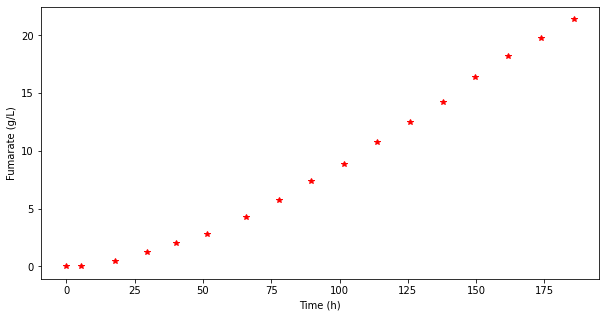

In [64]:
plt.figure(figsize=(10,5)) # With figsize you are able to adjust the size of the figures 
plt.plot(data["Time"],data["Fumarate"],'*r')
plt.xlabel("Time (h)")
plt.ylabel("Fumarate (g/L)")
plt.show()

Now plot the ethanol concentration from the sample data.

You can see that if you plot fumarate and ethanol on the same plot that you cannot clearly see the profile of ethanol. Plot each of them on their own axis. The following code is a good starting point. There are a variety of colors that you can plot with [here](https://matplotlib.org/stable/gallery/color/named_colors.html) is a list of most of them, simply use the argument "color = 'color_name'" to select for a color.

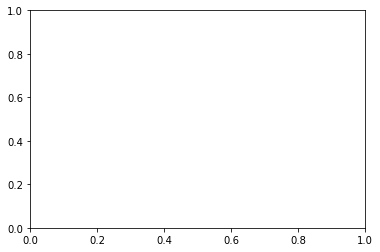

In [65]:
fig, ax1 = plt.subplots()

The desired plot will look like this:
<img src = "plot.png"/>

## 5. Integrating functions

In CBI310, you'll often have to integrate functions in order to see product profiles over time. To integrate functions, Python has a function in a library called `scipy`. The function is called `solve_ivp` and it is imported as shown below:

In [66]:
from scipy.integrate import solve_ivp

Please use `solve_ivp` instead of `odeint`. Odeint is outdated. So if you were fluent in pythonese, you would be able to learn the functionality of `solve_ivp` quickly. Unfortunately, few of us are that skilled. So here is a break down of its syntax.

* **`fun`**: The actual function you want to integrate. **Do not** include the () of the function, just the name
* **`t_span`**: The start and end of the range you want to integrate over. Must be given as 2 values in a list.
* **`y0`**: The starting point. It must be 1D, so you need to put it into a list bracket  as [y0]
* **`method`**: This will almost never be necessary to change. The default is the Runga Kutta you learned in WTW 263, called `"RK45"`. But, Runga Kutta has a weakness. It is an explicit method, and can not solve implicit equations. Read up about implicit differentials if you want to learn more. If you encounter a graph that is wavy and your code takes for ever, change the method to `"Radua"` or `"BDF"`. These are implicit methods.
* **`t_eval`**: This is an array of t values where you want the y values returned. I prefer doing this outside of the function, as this can interfere with the programs self optimisation. See below.
* **`dense_output`**: `solve_ivp` tries to keep its error low. But is also wants to save time. So it choses the largest steps it can take to stay within the error limit. This is a problem if you want many data points. Setting this to **`True`** will allow us to use the `.sol` function, and get the inbetween points. An alternative is the `t_eval` shown above
* **`events`**: This is a little magical function where we can force stop the program once a certain threshold is surpassed. The function you write for the event will stop when the returned value hits 0. An example will be shown. A note on events. Your event function must have the same input parameters as your integration function. So for instance if you have `def int_fun(t, y, a):` you must have `def event_fun(t, y, a):` as well. 
* **`args`**: This is for all the parameters you have in you integration function beyond the t and y. So if you have `def fun(t, y, a):` and want to set a, you will do it as `args = (a,)`. You have to use a tuple, which is anything in (). If you have one parameter you have to add a ',' but if you have more you do not need to end with a comma.

So when reading the docs, you not only need to read what the parameters are, but also what is returned. `solve_ivp()` does not just simply return a single array, it returns many things which you need to access yourself. Let's say you set `ans = solve_ivp(...stuffies...)`. These are the things that are returned

* `ans.t` = This returns an array and the shapes of the array. The array is the t values that the function used to estimate the integration. **Note** This array tends to be very sparse, so do not use it for plots. Use your own t array with the `.sol` method.
* `ans.y` =  This returns an array and the shapes of the array. The array is the corresponding y values of the t values.
* `ans.t_events` = If you have an event specified, you can access the t value at which it is activated
* `ans.y_events` = If you have an event specified, you can access the y value at which it is activated
* `ans.sol()` =  This is what I prefer using. If dense ouput is set to **True**, you can use this. In here you can insert an array of t values that will return the correspoding y values. Use this for generating plots.



Let's say we have a function for how your Money changes overtime:

$$\frac{dMoney}{dt} =  3t^3 - 50t^2 + 9t + 0.001(Money)$$

In [71]:
#We can now define a function with will give us the change in money

def equation(t, Money):
    dmoney =  3*t**3 - 50*t**2 + 9*t + 0.001*(Money)
    return dmoney

Now that we have a function we can specify a starting amount and a certain amount of time that we would like to evaluate the function over:

In [72]:
t_array = np.linspace(0,25,1001) #y --> We look at 25 years, thus our t_span will be [0, 25] 
M0 = 25000 #Initial amount

In [73]:
Money = solve_ivp(equation, [0, 25], [M0], dense_output= True)

As you can see below, the t values used are only 4, so thus plotting this is not sufficient. We will use the t_array we made.

In [74]:
Money.t 

array([ 0.        ,  0.26508961,  2.91598568, 25.        ])

One inserts the t_array into the `.sol()`. This will make an array. **Warning**: The `.sol` returns a 2D array, not 1D, so you need to use [0] after your y value array to be able to plot it with your t_array.

In [75]:
Money_y_vals = Money.sol(t_array)
Money_y_vals[0]

array([25000.        , 25000.62756021, 25001.25920277, ...,
       60064.62160316, 60459.44809915, 60856.23664666])

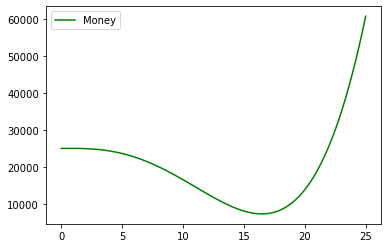

In [76]:
plt.plot(t_array, Money_y_vals[0], 'g',label = 'Money') #notice the [0] indexing
# plt.plot(tspan,Cb, label ='Cb')
plt.legend(loc='best')
plt.show()

Maria is worried that the population is increasing too quickly and that would mean that the world's chocolate supply would be severely strained. She finds that the rate of population growth is given by the following equation:

$$  \frac{dP}{dt} = P_{o}e^{rt}  $$

where:<br>
<br>
Po = the starting population <br>
<br>
r = % rate of growth <br>
<br>
t = the time (years) <br>
<br>
e = Euler's number

Solve this differential equation using $\texttt{solve_ivp}$ for an initial population of 7 billion people for 5 years with a % rate of growth of 1.1%

Reuben tells Maria that the world's chocolate supply would only be in danger if the world's population reached 8 billion people. How many years would it take to reach this 'event'? 

In [77]:
#Let's define those constants
Po = 7e9
r = 0.011
t = 20          #Pick an arbitrary number for time because we don't know what the solution will be
end_p = 8e9     #This is the population when the chocolate supply would be in danger

In [78]:
#We define the function just like before

def ode_2(t, P, r):
    
    dpdt = Po*np.exp(r*t)
    
    return dpdt

We will use an event that triggers when the population parameter reaches 8 billion. When we make the event function, keep in mind that it will stop the integration when the event function returns a 0. So here we want it to stop when the population hit 8 billion. Thus we return 8 billion minus the population. As the population grows it will eventually reach 8 billion. Notice that we have to say P[0], this is due to the fact that we give P0 in a list, and thus we need to take the value out of the list.

In [82]:
# Now we define an event, it takes the same inputs as the main function

def event_1(t, P, r):
    
    return end_p - P[0]    #This will return a zero when the population being solved is equal to the target population

In [83]:
t_span1 = np.linspace(0, t, 100)

In [84]:
sol_2 = solve_ivp(ode_2, [0, t], [Po], dense_output=True, events = event_1, args= (r,))

Now, we can find out when this 'event' will occur.

In [85]:
sol_2.t_events

[array([0.14274502])]

This is the point in time when the population will hit 8 billion. **Warning**: If using events and you want to plot, make your t_array using the t_events value. The function sometimes finds the t_event, but continues the integration of the t_span you specified.